# Introduction

In this document I will explore a subset of the passenger list from the Titanic looking at various variables to establish tentative correlation with survival.

### Questions I will be answering:

+ Does Age correlate with survival?
+ Does Gender correlate with survival?
+ Does socioeconomic status correlate with survival, specifically, does comimg from a higher social class contribute to survival?
+ If Gender and Socioeconommic status both have a positive correlation with survival, does socioeconomic status impact survival by gender across class? Put another way, is a 1st class male more or less likely to have survived than a woman from 3rd class?
+ Are single Passengers vs Passengers with family more likely to have survived?

### Disclaimer:

I am working with a subset of the full Titanic passenger list, I do not know if this subset is a random sampling. The list excludes staff/crew. As such all conclusions drawn can at best be tentative.


#### General introductory notes:

For the purposes of my analysis I will not be looking at the fields:'Ticket' (as the data is highly varied in type and I have not been able to establish what the various ticket letters and other prefixes mean). 'Fare' (as it likley strongly correlates correlates to 'Pclass' and is redundant for my purposes), 'Cabin' (as almost 4/5th's of the data has no cabin data)

I am also not concerned with the port the passenger embarked from, I am only interested in the fact that they were aboard.



## Missing Data: Age

As I inspected the data I noticed a significant number of passengers were missing data for age.

When missing data, the ideal is to find the missing values, for example in a survey, reaching out to the respondents and asking them to fill in the sections they left blank.

Obviously in this case that was not an option, however there are a number of online sources of data for Titanic pasengers that include age information

So the next step I took was to manually add the ages into the spreadsheet for those missing age information. 

I decided to do it manually because:

1) The amount of data was not so large as to take an extremely long time ( in fact I spent less than 2 hours on the task)
2) There were factors like variations of name spellings that a programatic solution would have taken far longer to code for than doing it manually

I used:  https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic
    
As my source of age information. This list contained most of the names I searched for. 

In some cases the names were close but not an exact match for the names in the data I was originally given, for example Masselmani, Mrs. Fatima was found on wikipedia page with the surname spelled Muslamani.  In cases where there were slight name variations like this I took an educated guess that the ticket agent or some other person involved during the booking or boarding process simply mispelled the names (a fairly common occurence for "foreign" names when handled by someone from England or America at that time)

Other examples include Moubarek, Master. Gerios which was listed on the Wikipdia page as Mubarik, Master Gerios and Samaan, Mr. Youssef which was found as Sa'maan, Mr. Youssef Omar "Joseph".

In some cases I was unable to find any obvious variation of the name on the wikipedia page in which case I did an individual search on google in the form of "[name] titanic" or, if name search still produced no results I used "[ticket number]" titanic

In most cases I found a page where the age of the passenger was clearly stated, If I found a page the age was not provided I used other information like birth dates to work out the age

##### The ones I did individual searches for are, separate from the wikipedia page are:

Robbins, Mr. Victor:  https://www.encyclopedia-titanica.org/titanic-victim/victor-robbins.html

Peter, Miss. Anna:  https://www.encyclopedia-titanica.org/titanic-survivor/anna-mary-joseph-peter-joseph.html

Boulos, Mrs. Joseph (Sultana): https://www.geni.com/people/Sultana-Boulos/6000000015783259196

Lefebre, Master. Henry Forbes: https://www.encyclopedia-titanica.org/titanic-victim/henry-lefebvre.html

Lefebre, Miss. Mathilde: https://www.encyclopedia-titanica.org/titanic-victim/mathilde-lefebvre.html

Zabour, Miss. Thamine: https://www.encyclopedia-titanica.org/titanic-victim/thamine-jabbur-zabour.html

Smith, Mr. Thomas: https://www.encyclopedia-titanica.org/titanic-victim/thomas-smyth.html 

Davison, Mrs. Thomas Henry (Mary E Finck): https://www.geni.com/people/Mary-Elizabeth-Davison/6000000015763378174

Gheorgheff, Mr. Stanio: https://www.encyclopedia-titanica.org/titanic-victim/stanio-gheorgheff.html

Yousseff, Mr. Gerious: https://www.encyclopedia-titanica.org/titanic-victim/yousseff-ibrahim-shawah.html (note while the name is different the ticket nbumbers matched and according to https://titanic.silk.co/explore/table/collection/t/filter/enum/ticket-number/2627 only 2 people had that ticket number with only 1 being male)

Kassem, Mr. Fared: http://www.titanic-titanic.com/fared_kassem_houssein.shtml

Toufik, Mr. Nakli: https://www.encyclopedia-titanica.org/titanic-victim/toufik-nakhli.html

Risien, Mr. Samuel Beard: https://www.encyclopedia-titanica.org/titanic-victim/samuel-beard-risien.html

Boulos, Mr. Hanna: https://www.encyclopedia-titanica.org/titanic-victim/boulos-hanna.html

Bradley, Mr. George ("George Arthur Brayton"): https://www.encyclopedia-titanica.org/titanic-survivor/george-brereton.html

Emir, Mr. Farred Chehab: https://www.encyclopedia-titanica.org/titanic-victim/emir-farres-chehab-shihab.html 

Mullens, Miss. Katherine "Katie"http://www.titanic-titanic.com/katherine_mullen.shtml

Moubarek, Master. Halim Gonios ("William George"): https://www.encyclopedia-titanica.org/titanic-survivor/halim-gonios-william-george-moubarek.html


##### no age information available at all, from any source

for Gheorgheff, Mr. Stanio and Kraeff, Mr. Theodor	 no date of birth or other indicators of age could be found, in cases like this I used the mean age which I took as the sum of all ages I had values for divided by the number of ages I had values for. (889 excluding the 2 I did not have age data for) the average age was 29.43

After adding that age for these 2 entries the mean age remained 29.43 when I took the sum of ages including all I had age data for inclusive of the 2 I used the mean age for divided by the total of datapoitns I now had (891)


##### Other methods of handling missing data that I rejected

There are a number of ways of handling missing data ranging from simply deleting the passengers missing age data from the list to replacing the missing values with substitute values. As the ideal is to have as complete and accurate a dataset as possible and as the information missing was available online I opted to fill in the missing values rather than deleteing or substituting values.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
## loading the corrected data set

filename = 'titanic-data-age-corrected.csv'

In [3]:
titanic_w_ages_df = pd.read_csv(filename)

In [4]:
## a quick look at the head 
titanic_w_ages_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,1,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Next I decided to eliminate fields I was not interested in.

These included Ticket, Fare, Cabin and Embarked

- I eliminated Ticket as the values varied widely with some having only numbers and some having letters and numbers.

- I eliminated Fare as it strongly correlates to Pclass and is therefor redundant

- I eliminated Cabin as Cabin location would not neccessarily correlate to survival as we do not know if passengers were on the same deck as their cabins, if they were in their cabins and because in many cases cabin information was missing.

- I eliminated embarked as we only need to know they are aboard the ship, not where they boarded from for my analysis

In [5]:
# clean data step 1
# drop ticket, fare, cabin and embarked
cleanedData_df = titanic_w_ages_df.drop(['Ticket','Fare','Cabin','Embarked'], axis = 1)

In [6]:
## a quick look at the cleaned head
cleanedData_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0


####   Let's look at the ages for all passengers



Populating the interactive namespace from numpy and matplotlib


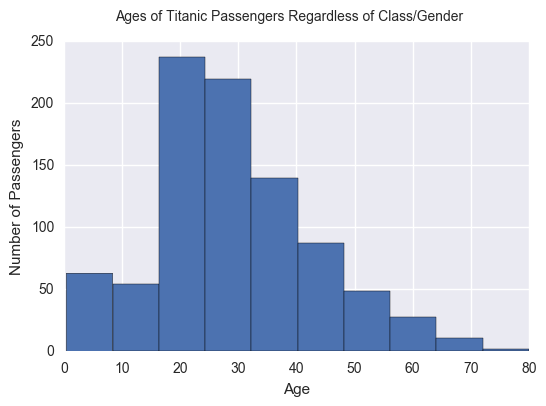

In [7]:
%pylab inline
age = cleanedData_df['Age'].values
plt.suptitle('Ages of Titanic Passengers Regardless of Class/Gender')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.hist(age)
plt.show()

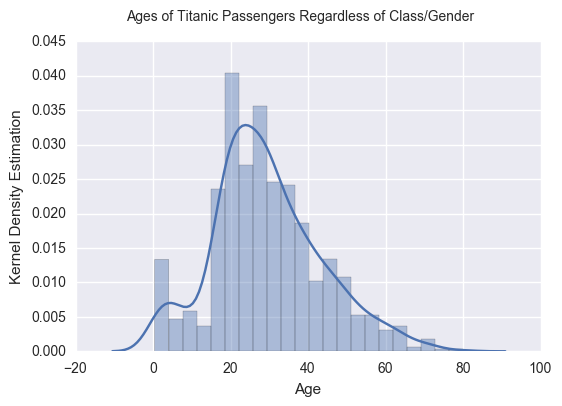

In [8]:
plt.suptitle('Ages of Titanic Passengers Regardless of Class/Gender')
plt.xlabel('Age')
plt.ylabel('Kernel Density Estimation')
sns.distplot(age)

In [10]:
meanAge = (cleanedData_df['Age'].mean())
print "mean age of Titanic passenger: " + str(round(meanAge, 2))

print""
print"General Age statistics"
cleanedData_df['Age'].describe().round(2)

mean age of Titanic passenger: 29.43

General Age statistics


count    891.00
mean      29.43
std       14.08
min        0.42
25%       20.00
50%       28.00
75%       38.00
max       80.00
Name: Age, dtype: float64

####   Let's look at survivals by gender. 

As survival is a 0 for did not survive and 1 for did survive summing by the "Survived" key will result in only survivors being counted 

In [11]:
print "Total passengers by Gender"
cleanedData_df.groupby(['Sex'])['PassengerId'].count()
totalFemales = int(cleanedData_df.groupby(['Sex'])['PassengerId'].count()[0])
totalMales = int(cleanedData_df.groupby(['Sex'])['PassengerId'].count()[1])
total_F_Surv = int(titanic_w_ages_df.groupby(['Sex'])['Survived'].sum()[0])
total_M_Surv = int(titanic_w_ages_df.groupby(['Sex'])['Survived'].sum()[1])
FemaleSurvRatio = (float(total_F_Surv)/float(totalFemales))
MaleSurvRatio = (float(total_M_Surv)/float(totalMales))
print "Total female passengers : ", totalFemales
print "Total male passengers : ", totalMales
print""
print""
print "Survivors by Gender"
print "Number of survived female passengers : ", total_F_Surv
print "Number of survived male passengers : ", total_M_Surv
print""
print "Out of ", (totalFemales + totalMales), " passengers in the dataset only ", (total_F_Surv+total_M_Surv), " survived"
print""
print""
print "Overall ratio (rounded) of female survivors to female passengers: " , round(FemaleSurvRatio, 2)
print "Overall ratio (rounded) of male survivors to male passengers: " , round(MaleSurvRatio, 2)

Total passengers by Gender
Total female passengers :  314
Total male passengers :  577


Survivors by Gender
Number of survived female passengers :  233
Number of survived male passengers :  109

Out of  891  passengers in the dataset only  342  survived


Overall ratio (rounded) of female survivors to female passengers:  0.74
Overall ratio (rounded) of male survivors to male passengers:  0.19


##### From this we can tentatively infer that within our partial dataset of survivors and insofar as our dataset is representative of the whole dataset, being female increased the chance of survival

Within the dataset approximately 74% of females survived while only 19% of males did

#### Lets look at the mean age of survivors versus deaths, by gender

In [12]:
print"Average Age of Survivors/Deaths by Gender, rounded to 2 decimal places"
print "0 = died, 1 = survived"
print ""
print cleanedData_df.groupby(['Sex','Survived'])['Age'].mean().round(2)

Average Age of Survivors/Deaths by Gender, rounded to 2 decimal places
0 = died, 1 = survived

Sex     Survived
female  0           24.41
        1           28.84
male    0           31.06
        1           27.43
Name: Age, dtype: float64


The average age of survivors for females is higher than non survivors, while the average age of male survivors is lower. But in either case the mean difference is only approximately +/-4 years.

This seems somewhat counter intuitive as I would have expected age to matter more.

#### Let's look at the breakdown of survival by gender and class

Survival ratios (rounded to 2 decimal places) by gender/class and mean age (rounded to 2 decimal places) of all passengers, by gender/class

In [14]:
pclass_data = cleanedData_df.drop(['PassengerId','SibSp','Parch'], axis = 1) 
pclass_data.groupby(['Pclass','Sex']).mean().round(2)



Survived    Age
Pclass Sex                    
1      female      0.97  35.11
       male        0.37  41.49
2      female      0.92  28.98
       male        0.16  30.39
3      female      0.50  22.19
       male        0.14  26.46

##### The mean age appears higher in the upper classes than the lower classes for all who boarded the Titanic

It also looks like survival ratios were higher for females than males regardless of class, but that survival ratios for 1st class males were 3x better than 3rd class males compared to less than a 2x increase in survival ratio for 1st class women compared to 3rd class.

Overall regardless of gender within this dataset 3rd class passengers had the lowest odds of survival

Class appears to have an impact on the likelihood of survival overall

#### Looking at Class in relation to survival

LEGEND: 0 (blue) = did not survive, 1 (green) = did survive


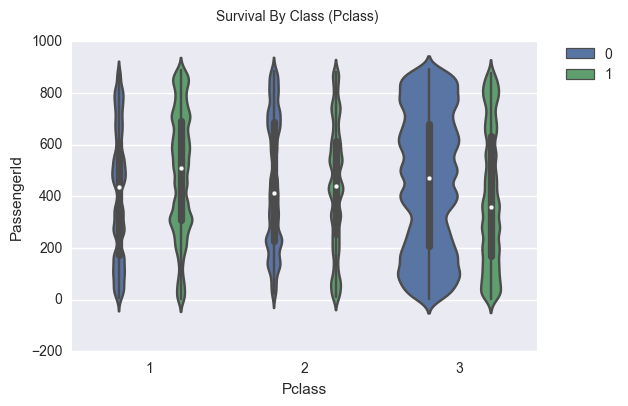

In [16]:
print "LEGEND: 0 (blue) = did not survive, 1 (green) = did survive"
plt.suptitle('Survival By Class (Pclass)')
sns.violinplot(x="Pclass", y="PassengerId", hue="Survived", data=titanic_w_ages_df, bw=.1, scale="count", scale_hue=False,)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

LEGEND: 0 (blue) = did not survive, 1 (green) = did survive


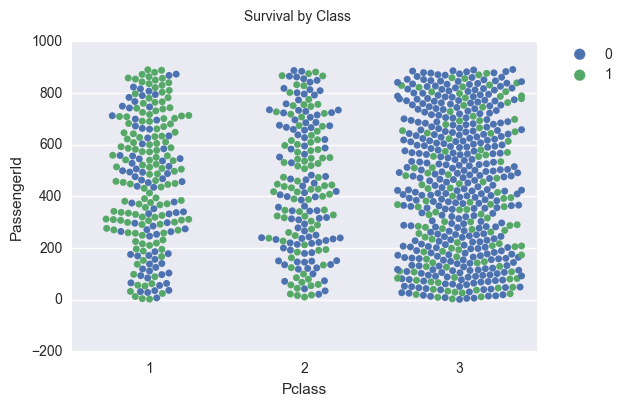

In [17]:
print "LEGEND: 0 (blue) = did not survive, 1 (green) = did survive"
plt.suptitle('Survival by Class')
sns.swarmplot(x="Pclass", y="PassengerId", hue="Survived", data = titanic_w_ages_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [18]:
print"Average Age of Surviors/Deaths by Gender, rounded to 2 decimal places"
print "0 = died, 1 = survived"
print ""
cleanedData_df.groupby(['Sex','Survived', 'Pclass'])['Age'].mean().round(2)

Average Age of Surviors/Deaths by Gender, rounded to 2 decimal places
0 = died, 1 = survived



Sex     Survived  Pclass
female  0         1         25.67
                  2         36.00
                  3         23.39
        1         1         35.42
                  2         28.38
                  3         20.99
male    0         1         44.28
                  2         32.89
                  3         27.11
        1         1         36.72
                  2         17.02
                  3         22.30
Name: Age, dtype: float64

Here we can see that age appears to matter for survivability more in lower classes than in the upper class, however given that the average age by class of all passengers is higher the higher the class this is not a strong indication of correlation between age and survival rate (see next chart)

####  Chart showing age population denisty by Pclass

This chart clearly shows that the lower classes had greater numbers of younger passengers. GIven that, it would be expected that the mean survival age would be lower for these groups 

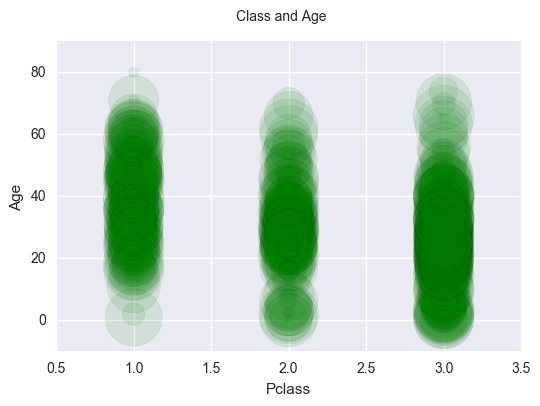

In [19]:
x = cleanedData_df['Pclass']
y = cleanedData_df['Age']
plt.suptitle('Class and Age')
plt.xlabel('Pclass')
plt.ylabel('Age')
N = 50
area = np.pi * (25 * np.random.rand(N))**2  # 0 to 25 point radiuses
colors = ['green']
plt.scatter(x,y, s = area, c=colors, alpha= 0.1)
plt.show()

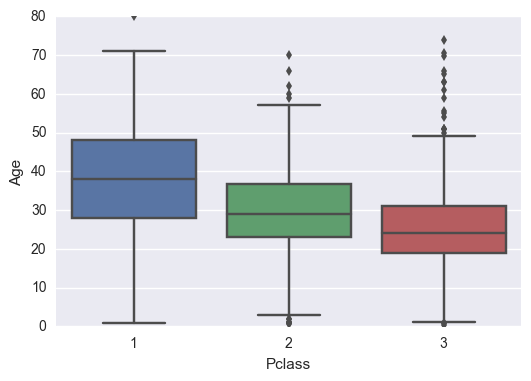

In [20]:
sns.boxplot(x="Pclass", y="Age", data=cleanedData_df)

From the above charts we can see that 1st class tended to middle age and elderly while 2nd and 3rd classes had far more younger passengers. 

#### Overall survival by Pclass

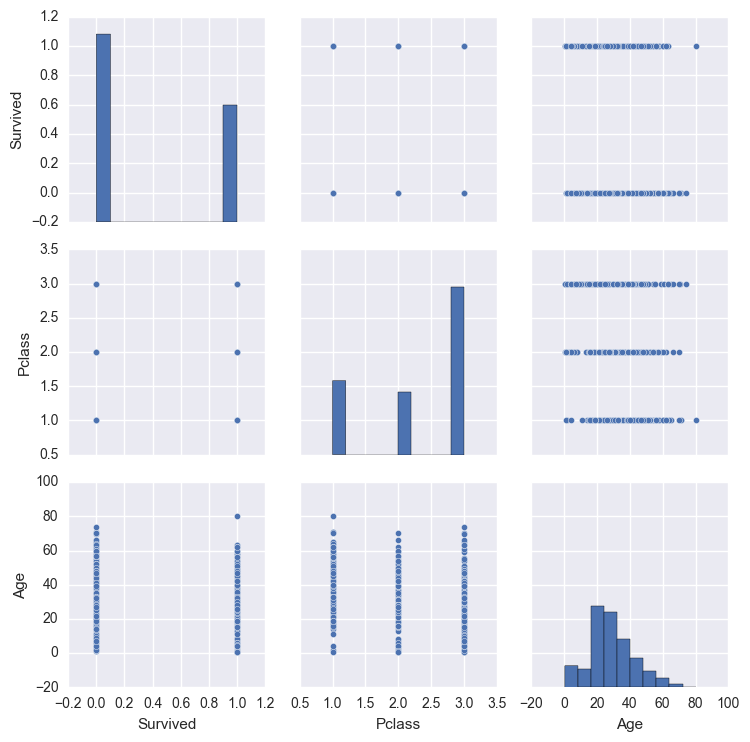

In [21]:
plt.suptitle('Class and Survival')
sns.pairplot(pclass_data)
plt.show()

##### Survival/died by class

For a clearer look at class/gender survival relationships I will remove the age variable

In [22]:
pclass_data = titanic_w_ages_df.drop(['PassengerId','SibSp','Parch','Fare', 'Age'], axis = 1)
pclass_data.groupby(['Pclass', 'Sex']).mean().round(2)

Survived
Pclass Sex             
1      female      0.97
       male        0.37
2      female      0.92
       male        0.16
3      female      0.50
       male        0.14

Gender, Class and Survival


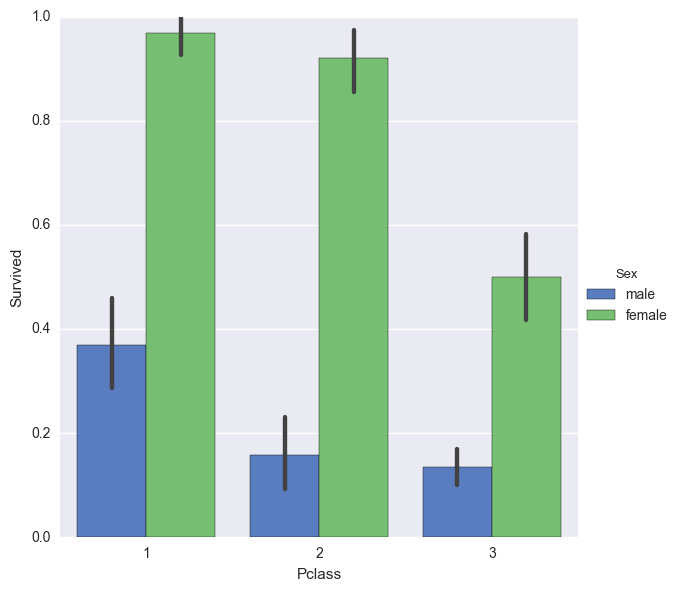

In [23]:
print 'Gender, Class and Survival'
sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=cleanedData_df,
                 size=6, kind="bar", palette="muted")

There does seem to be  a strong correlation between class and survival rates, to the point that it influences gender survival across classes, especially for 1st class passengers

#### Let's look at the overall numbers of those who boarded by class, gender and survival

In [24]:
pclass_survivors = pclass_data.drop(['Name', 'Ticket', 'Cabin' ], axis = 1)
pclass_survivors.groupby(['Pclass', 'Sex', 'Survived']).count()

Embarked
Pclass Sex    Survived          
1      female 0                3
              1               89
       male   0               77
              1               45
2      female 0                6
              1               70
       male   0               91
              1               17
3      female 0               72
              1               72
       male   0              300
              1               47

In [25]:
class_embarked = titanic_w_ages_df.groupby(['Pclass','Sex'])['Embarked'].count()

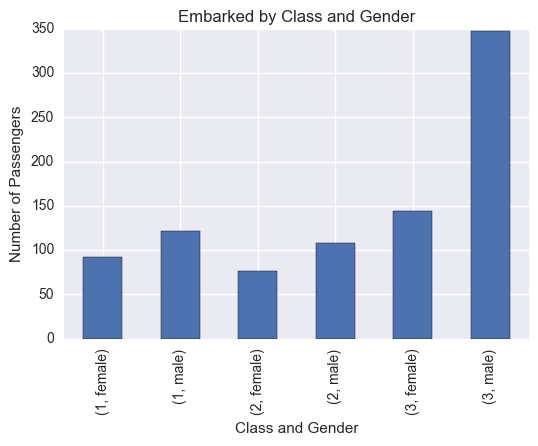

In [26]:
class_embarked.plot(kind='bar')
plt.ylabel('Number of Passengers')
plt.xlabel('Class and Gender')
plt.title('Embarked by Class and Gender')

plt.show()

In [27]:
class_survival = cleanedData_df.groupby(['Pclass','Sex'])['Survived'].sum()

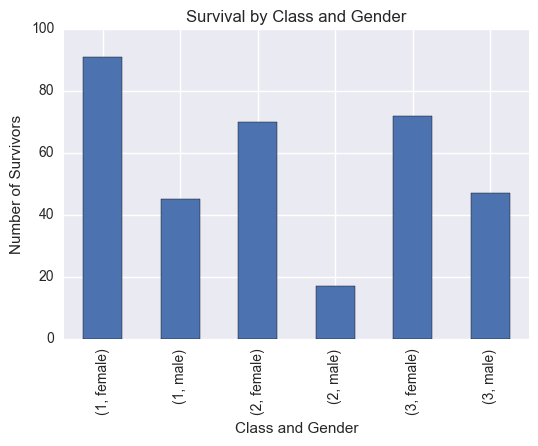

In [28]:
class_survival.plot(kind='bar')
plt.ylabel('Number of Survivors')
plt.xlabel('Class and Gender')
plt.title('Survival by Class and Gender')

plt.show()

The 2 charts above show the stark difference class made to survival within this dataset even across gender boundaries.

From this we can see a trend, that tentatively supports the hypothesis that class was a factor of significance across classes, to a certain extent overriding the impact of gender while within classes gender mattered far more than class.

A 1st class female passenger had approx 97% chance of surviving while 2nd class female had 92% chance (only a 5 % difference) and a 3rd class female only had a 50%. This is what I would have expected given my knowledge of classes and their importance at that time in history

But when we look at the male survival rate we see that class counted more across the class divide, nearly twice as many 1st class males survived as 2nd class while the difference between 2nd and 3rd classs is nominal for males.

1st class males were only 26% less likely to survive than 3rd class females. Compared to 3rd class males who were 73% less likely to survive than 3rd class females

A 1st class male was almost 3x as likely to survive than a 3rd class male while 1st class females were a little less than 2x as likely to survive a 3rd class female

#### Now lets look at those travelling alone vs those travelling with at least 1 family member

I will replace add Parch and SibSp values and then divide by those same values and then use fillna to convert Nan to 0 for a new field: hasFamily

In [29]:
titanic_w_ages_df['hasFamily'] = titanic_w_ages_df[['Parch', 'SibSp']].any(axis=1, skipna=False).astype(int)
titanic_w_ages_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hasFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,1,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [30]:
titanic_w_ages_df.groupby(['hasFamily'])['PassengerId'].count()

hasFamily
0    608
1    283
Name: PassengerId, dtype: int64

Out of the 891 passengers on in the dataset 608 were travelling alone, 283 with family relations of some kind

In [31]:
family_survivors = titanic_w_ages_df.drop(['Age','Name', 'SibSp','Parch','Pclass','Embarked','PassengerId', 'Fare'], axis = 1)
family_survivors.groupby(['hasFamily'])['Survived'].mean().round(2)


hasFamily
0    0.38
1    0.39
Name: Survived, dtype: float64

Class and Survival in relationship to having family aboard


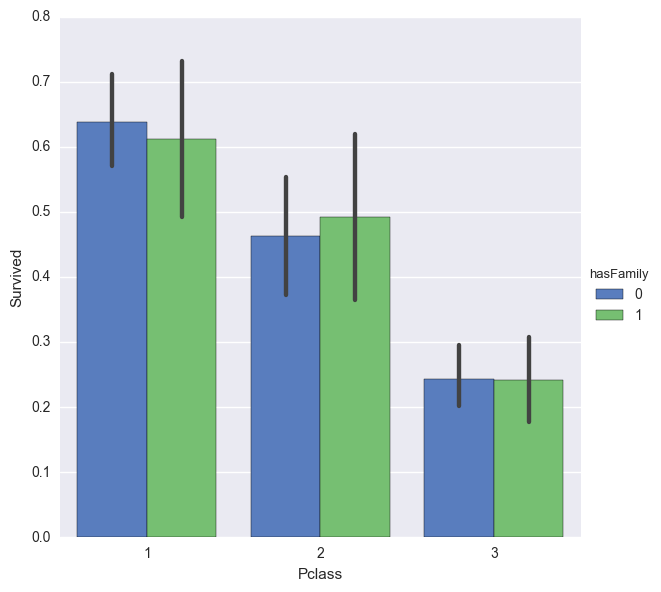

In [32]:
print 'Class and Survival in relationship to having family aboard'
sns.factorplot(x='Pclass', y='Survived', hue='hasFamily', data=titanic_w_ages_df,
                 size=6, kind="bar", palette="muted")

##### It appears that travelling with a family member had little impact on survival rates

The impact of travelling with a family member vs travelling alone seems to have had little impact when looked at survival rates by class within this dataset.

In [33]:
family_survivors = titanic_w_ages_df.drop(['Age','Name', 'SibSp','Parch','Embarked','PassengerId', 'Fare'], axis = 1)
family_survivors.groupby(['Pclass', 'hasFamily']).mean().round(2)


Survived
Pclass hasFamily          
1      0              0.64
       1              0.61
2      0              0.46
       1              0.49
3      0              0.24
       1              0.24

#  Conclusions

Note: all conclusions are tentative as I do not know if the dataset is a random selection from the full dataset of all passengers aboard the Titanic, and therefor how representative it is of all passengers who were aboard the Titanic

### Original Questions

+ Does Age correlate with survival?
+ Does Gender correlate with survival?
+ Does socioeconomic status correlate with survival, specifically, does comimg from a higher social class contribute to survival?
+ If Gender and Socioeconommic status both have a positive correlation with survival, does socioeconomic status impact survival by gender across class? Put another way, is a 1st class male more or less likely to have survived than a woman from 3rd class?
+ Are single Passengers vs Passengers with family more likely to have survived?

### Age

Age does not seem to have as strong a correlation to survival as I would have expected, whether this is because the dataset is not representative of the whole, or whether there were other factors, for example a young child may have survived the sinking but died from exposure before rescue, I do not know.

### Gender

Gender seems to have a strong correlation to survival

###### Approximate ratio of survival by gender
ratio of female survivors to female passengers:  0.75

ratio of male survivors to male passengers:  0.19

### Class

Class seems to strongly correlate to survival, to the point that it seems to influence the gender survival ratio's 

A 1st class female passenger had approx 97% chance of surviving while 2nd class female had 92% chance (only a 5 % difference) and a 3rd class female only had a 50%.

But when we look at the male survival rate we see that class counted more across the class divide, nearly twice as many 1st class males survived as 2nd class while the difference between 2nd and 3rd classs is nominal for males.

A 1st class male was almost 3x as likely to survive than a 3rd class male while 1st class females were a little less than 2x as likely to survive a 3rd class female

Of real interest to me was the affect classs seems to have across class/gender boundaries

1st class males were only 26% less likely to survive than 3rd class females. Compared to 3rd class males who were 73% less likely to survive than 3rd class females, so while a 1st class male was not more likely to survive than a 3rd class female, the likelihood of a 1st class male surviving was significantly improved when comparing survival rates of 2nd and 3rd class males to 3rd class females.


### Travelling Alone or with Spouse/Parents/Siblings


It appears that travelling with a family member made little difference to survival rates



